In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv('D:/Afumoons/OneDrive/Matkul/Data Mining/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.insert(value=data.Name.map(lambda name: name.split(",")[1].split(".")[0].strip()),loc=12,column="Title")

In [5]:
title_map={"Capt":"Officer",
           "Col":"Officer",
           "Major":"Officer",
           "Johkheer":"Royalty",
           "Don":"Royalty",
           "Sir":"Royalty",
           "Dr":"Royalty",
           "Rev":"Officer",
           "The Countess":"Royalty",
           "Dona":"Royalty",
           "Mme":"Mrs",
           "Mlle":"Miss",
           "Ms":"Mrs",
           "Mr":"Mr",
           "Mrs":"Mrs",
           "Miss":"Miss",
           "Master":"Master",
           "Lady":"Officer"}
data["Title"]=data.Title.map(title_map)

In [6]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss


In [7]:
data["Title"].value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     12
Royalty      9
Name: Title, dtype: int64

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            2
dtype: int64

In [9]:
def passenger_type (row):
    if row['Age']<2:
        return 'Infant'
    elif (row['Age']>=2 and row['Age']<12):
        return 'Child'
    elif (row['Age']>=12 and row['Age']<18):
        return 'Youth'
    elif (row['Age']>=18 and row['Age']<65):
        return 'Adult'
    elif row['Age']>=65:
        return 'Senior'
    elif row['Title']>='Master':
        return 'Adult'
    elif row['Title']>='Miss':
        return 'Youth'
    elif row['Title']>='Mr' or row['Title']=='Mrs':
        return 'Adult'
    else:
        return 'Unknown'

In [10]:
data['PassengerType']=data.apply(lambda row: passenger_type(row),axis=1)

In [11]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Adult


In [12]:
data["PassengerType"].value_counts()

Adult     767
Child      54
Youth      45
Infant     14
Senior     11
Name: PassengerType, dtype: int64

In [13]:
sex_map={"male":1,"female":0}
data["Sex"]=data["Sex"].map(sex_map)

In [14]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Adult


In [15]:
passengertype_map={"Unknown":0,"Infant":1,"Child":2,"Youth":3,"Adult":4,"Senior":5}
data["PassengerType"]=data["PassengerType"].map(passengertype_map)

In [16]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,4
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,4


In [17]:
kolom = ['Name', 'Age']
data2 = pd.read_csv('D:/Afumoons/OneDrive/Matkul/Data Mining/train.csv', usecols=kolom, nrows=12)
data2.insert(value=data2.Name.map(lambda name: name.split(",")[1].split(".")[0].strip()),loc=2,column="Title")
data2["Title"]=data2.Title.map(title_map)
data2['PassengerType']=data2.apply(lambda row: passenger_type(row),axis=1)
data2.head()

,Name,Age,Title,PassengerType
0,"Braund, Mr. Owen Harris",22.0,Mr,Adult
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,Mrs,Adult
2,"Heikkinen, Miss. Laina",26.0,Miss,Adult
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,Mrs,Adult
4,"Allen, Mr. William Henry",35.0,Mr,Adult


In [18]:
#Nominal
nencode = pd.get_dummies(data2['Name'])
nencode.head()

,"Allen, Mr. William Henry","Bonnell, Miss. Elizabeth","Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Thayer)","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Heikkinen, Miss. Laina","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","McCarthy, Mr. Timothy J","Moran, Mr. James","Nasser, Mrs. Nicholas (Adele Achem)","Palsson, Master. Gosta Leonard","Sandstrom, Miss. Marguerite Rut"
0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [19]:
data3 = pd.concat([data2, nencode], axis='columns')
data3

,Name,Age,Title,PassengerType,"Allen, Mr. William Henry","Bonnell, Miss. Elizabeth","Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Thayer)","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Heikkinen, Miss. Laina","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","McCarthy, Mr. Timothy J","Moran, Mr. James","Nasser, Mrs. Nicholas (Adele Achem)","Palsson, Master. Gosta Leonard","Sandstrom, Miss. Marguerite Rut"
0,"Braund, Mr. Owen Harris",22.0,Mr,Adult,0,0,1,0,0,0,0,0,0,0,0,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,Mrs,Adult,0,0,0,1,0,0,0,0,0,0,0,0
2,"Heikkinen, Miss. Laina",26.0,Miss,Adult,0,0,0,0,0,1,0,0,0,0,0,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,Mrs,Adult,0,0,0,0,1,0,0,0,0,0,0,0
4,"Allen, Mr. William Henry",35.0,Mr,Adult,1,0,0,0,0,0,0,0,0,0,0,0
5,"Moran, Mr. James",NaN,Mr,Adult,0,0,0,0,0,0,0,0,1,0,0,0
6,"McCarthy, Mr. Timothy J",54.0,Mr,Adult,0,0,0,0,0,0,0,1,0,0,0,0
7,"Palsson, Master. Gosta Leonard",2.0,Master,Child,0,0,0,0,0,0,0,0,0,0,1,0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,Mrs,Adult,0,0,0,0,0,0,1,0,0,0,0,0
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,Mrs,Youth,0,0,0,0,0,0,0,0,0,1,0,0


In [20]:
data3.drop(columns=["Name","Age","Title"], inplace=True)
data3

,PassengerType,"Allen, Mr. William Henry","Bonnell, Miss. Elizabeth","Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Thayer)","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Heikkinen, Miss. Laina","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","McCarthy, Mr. Timothy J","Moran, Mr. James","Nasser, Mrs. Nicholas (Adele Achem)","Palsson, Master. Gosta Leonard","Sandstrom, Miss. Marguerite Rut"
0,Adult,0,0,1,0,0,0,0,0,0,0,0,0
1,Adult,0,0,0,1,0,0,0,0,0,0,0,0
2,Adult,0,0,0,0,0,1,0,0,0,0,0,0
3,Adult,0,0,0,0,1,0,0,0,0,0,0,0
4,Adult,1,0,0,0,0,0,0,0,0,0,0,0
5,Adult,0,0,0,0,0,0,0,0,1,0,0,0
6,Adult,0,0,0,0,0,0,0,1,0,0,0,0
7,Child,0,0,0,0,0,0,0,0,0,0,1,0
8,Adult,0,0,0,0,0,0,1,0,0,0,0,0
9,Youth,0,0,0,0,0,0,0,0,0,1,0,0


In [21]:
#Ordinal
data3['PassengerType'].replace(passengertype_map, inplace=True)
data3

,PassengerType,"Allen, Mr. William Henry","Bonnell, Miss. Elizabeth","Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Thayer)","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Heikkinen, Miss. Laina","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","McCarthy, Mr. Timothy J","Moran, Mr. James","Nasser, Mrs. Nicholas (Adele Achem)","Palsson, Master. Gosta Leonard","Sandstrom, Miss. Marguerite Rut"
0,4,0,0,1,0,0,0,0,0,0,0,0,0
1,4,0,0,0,1,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,1,0,0,0,0,0,0
3,4,0,0,0,0,1,0,0,0,0,0,0,0
4,4,1,0,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,0,0,0,0,0,1,0,0,0
6,4,0,0,0,0,0,0,0,1,0,0,0,0
7,2,0,0,0,0,0,0,0,0,0,0,1,0
8,4,0,0,0,0,0,0,1,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,1,0,0


In [22]:
def titanic_corr(data):
  correlation=data.corr()
  sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")

In [23]:
data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,PassengerType
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658,0.010215
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.146584
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,-0.131452
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.096673
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.672077
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.345670
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.358976
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.002842
PassengerType,0.010215,-0.146584,-0.131452,0.096673,0.672077,-0.345670,-0.358976,0.002842,1.000000


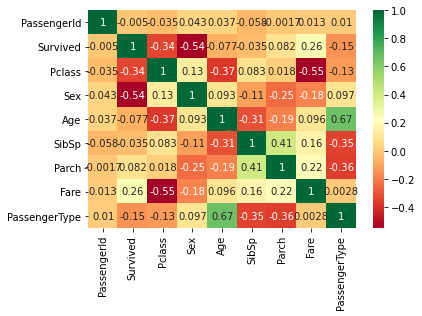

In [24]:
titanic_corr(data)

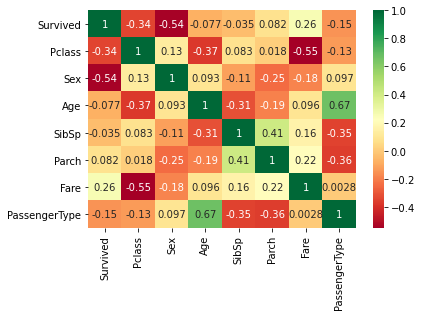

In [25]:
data.drop(["PassengerId"], inplace=True, axis=1)
titanic_corr(data)

In [26]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,4
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,4
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,4
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,4
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,Officer,4
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,Miss,4
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,4
889,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,Mr,4


In [27]:
data.drop(["Name","Age","Ticket","Cabin","Embarked"], inplace=True, axis=1)
data.head(3)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Title,PassengerType
0,0,3,1,1,0,7.2500,Mr,4
1,1,1,0,1,0,71.2833,Mrs,4
2,1,3,0,0,0,7.9250,Miss,4


In [28]:
def title_type (row):
    if row['Title']=='Mrs' or row['Title']=='Miss':
        return 1
    elif row['Title']=='Mr':
        return 2
    elif row['Title']=='Officer':
        return 3
    elif row['Title']=='Master':
        return 4
    elif row['Title']=='Royalty':
        return 5
    else:
        return 0

In [29]:
data['Title']=data.apply(lambda row: title_type(row),axis=1)
data.head(3)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Title,PassengerType
0,0,3,1,1,0,7.2500,2,4
1,1,1,0,1,0,71.2833,1,4
2,1,3,0,0,0,7.9250,1,4


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [31]:
xdata = data.drop('Survived',axis=1)
ydata = data.Survived
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size=0.3, random_state=1)

In [32]:
#Algoritma Decision Tree https://medium.com/@ksnugroho/confusion-matrix-untuk-evaluasi-model-pada-unsupervised-machine-learning-bc4b1ae9ae3f
dt=DecisionTreeClassifier()
dt=dt.fit(xtrain,ytrain)

In [33]:
ypred_dt = dt.predict(xtest)
ypred_dt

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1], dtype=int64)

In [34]:
#Nilai Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, ypred_dt)

array([[131,  22],
       [ 41,  74]], dtype=int64)

In [35]:
#Nilai akurasi
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_dt))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       153
           1       0.77      0.64      0.70       115

    accuracy                           0.76       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.76      0.76       268



In [36]:
#Algoritma Naive Bayes https://medium.com/@gifadelyaninursyafitri/klasifikasi-data-caesarian-dengan-menggunakan-algoritma-naive-bayes-dengan-python-72f5dc8cd352
#Import fungsi klasifikasi Naive Bayes
from sklearn.naive_bayes import GaussianNB
modelnb = GaussianNB()

In [37]:
#Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(xtrain, ytrain)
nbtrain.class_count_

array([396., 227.])

In [38]:
#Menentukan hasil prediksi data testing
ypred_nb = nbtrain.predict(xtest)
ypred_nb

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0], dtype=int64)

In [39]:
#Confusion matrix
confusion_matrix(ytest, ypred_nb)

array([[126,  27],
       [ 38,  77]], dtype=int64)

In [40]:
#Nilai akurasi
print(classification_report(ytest, ypred_nb))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       153
           1       0.74      0.67      0.70       115

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



In [41]:
#Algoritma Support Vector Machine https://medium.com/@kurniasp/support-vector-machine-classification-with-python-64521fbd5b57
#Import svm model
from sklearn import svm
#Create a svm Classifier
svmtrain = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
svmtrain.fit(xtrain, ytrain)
#Predict the response for test dataset
ypred_svm = svmtrain.predict(xtest)

In [42]:
#Confusion matrix
confusion_matrix(ytest, ypred_svm)

array([[130,  23],
       [ 39,  76]], dtype=int64)

In [43]:
#Nilai akurasi
print(classification_report(ytest, ypred_svm))
#support data masing" class
#precision Rasio jumlah perbandingan benar positif dengan keseluruhan hasil yg diprediksi positif
#recall rasio jumlah perbandingan prediksi benar positif dengan keseluruhan data yang benar positif

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       153
           1       0.77      0.66      0.71       115

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [44]:
#Algoritma KNN
#Import KNN
from sklearn.neighbors import KNeighborsClassifier
#Train the model 
KNN=KNeighborsClassifier().fit(xtrain,ytrain)
#Predict the response for test dataset
ypred_knn = KNN.predict(xtest)

In [45]:
#Confusion matrix
confusion_matrix(ytest, ypred_knn)

array([[128,  25],
       [ 38,  77]], dtype=int64)

In [46]:
#Nilai akurasi
print(classification_report(ytest, ypred_knn))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       153
           1       0.75      0.67      0.71       115

    accuracy                           0.76       268
   macro avg       0.76      0.75      0.76       268
weighted avg       0.76      0.76      0.76       268



In [47]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
plt.rc("font", size = 14)

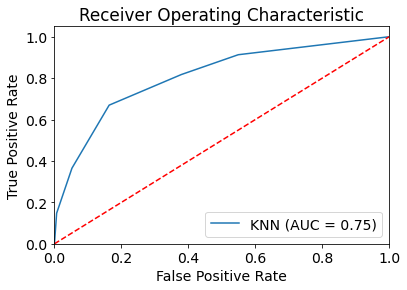

In [48]:
KNN_roc_auc = roc_auc_score(ytest, KNN.predict(xtest))
knn_fpr, knn_tpr, knn_thresholds = roc_curve(ytest, KNN.predict_proba(xtest)[:, 1])
plt.figure()
plt.plot(knn_fpr, knn_tpr, label = 'KNN (AUC = %0.2f)' % KNN_roc_auc)
plt.plot([0, 1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")
plt.show()

In [49]:
#Tugas Mahasiswa 1

Decision Tree


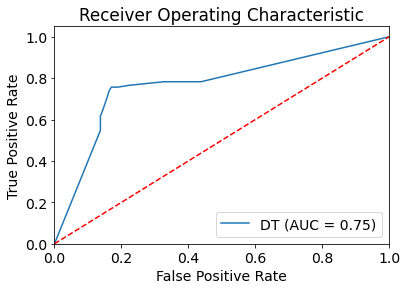

In [50]:
print("Decision Tree")
dt_roc_auc = roc_auc_score(ytest, dt.predict(xtest))
dt_fpr, dt_tpr, dt_thresholds = roc_curve(ytest, dt.predict_proba(xtest)[:, 1])
plt.figure()
plt.plot(dt_fpr, dt_tpr, label = 'DT (AUC = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")

plt.show()

Naive Bayes


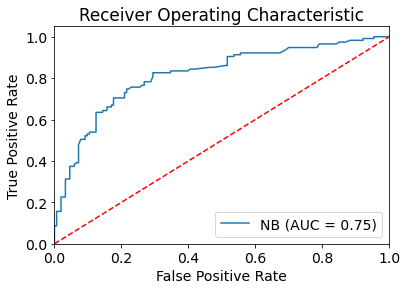

In [51]:
print("Naive Bayes")
nb_roc_auc = roc_auc_score(ytest, nbtrain.predict(xtest))
nb_fpr, nb_tpr, nb_thresholds = roc_curve(ytest, nbtrain.predict_proba(xtest)[:, 1])
plt.figure()
plt.plot(nb_fpr, nb_tpr, label = 'NB (AUC = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")
plt.show()

In [52]:
#Bagian 2

In [53]:
from sklearn.model_selection import cross_val_score
KNN=KNeighborsClassifier()

In [54]:
#KNN
#Akurasi
scores_accuracy_KNN = cross_val_score(KNN, xdata, ydata, cv=5, scoring='accuracy')
print(scores_accuracy_KNN)
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy_KNN.mean(), scores_accuracy_KNN.std()))
#Presisi
scores_precision_KNN = cross_val_score(KNN, xdata, ydata, cv=5, scoring='precision_macro')
print(scores_precision_KNN)
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision_KNN.mean(), scores_precision_KNN.std()))
#Recall
scores_recall_KNN = cross_val_score(KNN, xdata, ydata, cv=5, scoring='recall_macro')
print(scores_recall_KNN)
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall_KNN.mean(), scores_recall_KNN.std()))
#F1score
scores_f1_KNN = cross_val_score(KNN, xdata, ydata, cv=5, scoring='f1_macro')
print(scores_f1_KNN)
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1_KNN.mean(), scores_f1_KNN.std()))

[0.75977654 0.73033708 0.83707865 0.78089888 0.76966292]
Rata-rata nilai akurasi: 0.78 (+/- 0.04)
[0.74814768 0.71426585 0.82641879 0.77204102 0.76235632]
Rata-rata nilai precision macro: 0.76 (+/- 0.04)
[0.75592885 0.70601604 0.83449198 0.75534759 0.74278686]
Rata-rata nilai recall macro: 0.76 (+/- 0.04)
[0.75078517 0.70918993 0.82972126 0.76130385 0.74906303]
Rata-rata nilai f1 macro: 0.76 (+/- 0.04)


In [55]:
#Decision Tree
#Akurasi
scores_accuracy_dt = cross_val_score(dt, xdata, ydata, cv=5, scoring='accuracy')
print(scores_accuracy_dt)
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy_dt.mean(), scores_accuracy_dt.std()))
#Presisi
scores_precision_dt = cross_val_score(dt, xdata, ydata, cv=5, scoring='precision_macro')
print(scores_precision_dt)
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision_dt.mean(), scores_precision_dt.std()))
#Recall
scores_recall_dt = cross_val_score(dt, xdata, ydata, cv=5, scoring='recall_macro')
print(scores_recall_dt)
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall_dt.mean(), scores_recall_dt.std()))
#F1score
scores_f1_dt = cross_val_score(dt, xdata, ydata, cv=5, scoring='f1_macro')
print(scores_f1_dt)
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1_dt.mean(), scores_f1_dt.std()))

[0.75977654 0.79213483 0.84831461 0.79213483 0.83146067]
Rata-rata nilai akurasi: 0.80 (+/- 0.03)
[0.74080595 0.78851502 0.83992201 0.79969552 0.82477876]
Rata-rata nilai precision macro: 0.80 (+/- 0.03)
[0.74782609 0.77740642 0.83796791 0.76163102 0.81717857]
Rata-rata nilai recall macro: 0.79 (+/- 0.03)
[0.74193971 0.7765564  0.83891403 0.77191342 0.80962567]
Rata-rata nilai f1 macro: 0.79 (+/- 0.03)


In [56]:
#Naive Bayes
#Akurasi
scores_accuracy_nb = cross_val_score(nbtrain, xdata, ydata, cv=5, scoring='accuracy')
print(scores_accuracy_nb)
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy_nb.mean(), scores_accuracy_nb.std()))
#Presisi
scores_precision_nb = cross_val_score(nbtrain, xdata, ydata, cv=5, scoring='precision_macro')
print(scores_precision_nb)
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision_nb.mean(), scores_precision_nb.std()))
#Recall
scores_recall_nb = cross_val_score(nbtrain, xdata, ydata, cv=5, scoring='recall_macro')
print(scores_recall_nb)
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall_nb.mean(), scores_recall_nb.std()))
#F1score
scores_f1_nb = cross_val_score(nbtrain, xdata, ydata, cv=5, scoring='f1_macro')
print(scores_f1_nb)
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1_nb.mean(), scores_f1_nb.std()))

[0.77653631 0.80337079 0.79775281 0.7752809  0.83146067]
Rata-rata nilai akurasi: 0.80 (+/- 0.02)
[0.7649359  0.79158357 0.78563941 0.76288377 0.82249701]
Rata-rata nilai precision macro: 0.79 (+/- 0.02)
[0.77226614 0.79318182 0.79144385 0.75641711 0.82249701]
Rata-rata nilai recall macro: 0.79 (+/- 0.02)
[0.76765317 0.7923541  0.78809524 0.75919913 0.82249701]
Rata-rata nilai f1 macro: 0.79 (+/- 0.02)


In [57]:
#SVM
#Akurasi
scores_accuracy_svm = cross_val_score(svmtrain, xdata, ydata, cv=5, scoring='accuracy')
print(scores_accuracy_svm)
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy_svm.mean(), scores_accuracy_svm.std()))
#Presisi
scores_precision_svm = cross_val_score(svmtrain, xdata, ydata, cv=5, scoring='precision_macro')
print(scores_precision_svm)
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision_svm.mean(), scores_precision_svm.std()))
#Recall
scores_recall_svm = cross_val_score(svmtrain, xdata, ydata, cv=5, scoring='recall_macro')
print(scores_recall_svm)
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall_svm.mean(), scores_recall_svm.std()))
#F1score
scores_f1_svm = cross_val_score(svmtrain, xdata, ydata, cv=5, scoring='f1_macro')
print(scores_f1_svm)
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1_svm.mean(), scores_f1_svm.std()))

[0.83240223 0.81460674 0.80337079 0.78089888 0.83146067]
Rata-rata nilai akurasi: 0.81 (+/- 0.02)
[0.82312253 0.80402044 0.79285228 0.77056186 0.82345032]
Rata-rata nilai precision macro: 0.80 (+/- 0.02)
[0.82312253 0.80227273 0.78756684 0.75815508 0.81983779]
Rata-rata nilai recall macro: 0.80 (+/- 0.02)
[0.82312253 0.80311714 0.78994572 0.76293413 0.82152406]
Rata-rata nilai f1 macro: 0.80 (+/- 0.02)


In [58]:
#Perbandingan Akurasi
print("Rata-rata nilai akurasi KNN: %0.2f (+/- %0.2f)" % (scores_accuracy_KNN.mean(), scores_accuracy_KNN.std()))
print("Rata-rata nilai akurasi DT: %0.2f (+/- %0.2f)" % (scores_accuracy_dt.mean(), scores_accuracy_dt.std()))
print("Rata-rata nilai akurasi NB: %0.2f (+/- %0.2f)" % (scores_accuracy_nb.mean(), scores_accuracy_nb.std()))
print("Rata-rata nilai akurasi SVM: %0.2f (+/- %0.2f)" % (scores_accuracy_svm.mean(), scores_accuracy_svm.std()))

Rata-rata nilai akurasi KNN: 0.78 (+/- 0.04)
Rata-rata nilai akurasi DT: 0.80 (+/- 0.03)
Rata-rata nilai akurasi NB: 0.80 (+/- 0.02)
Rata-rata nilai akurasi SVM: 0.81 (+/- 0.02)


In [59]:
#Perbandingan Precision
print("Rata-rata nilai precision KNN: %0.2f (+/- %0.2f)" % (scores_precision_KNN.mean(), scores_precision_KNN.std()))
print("Rata-rata nilai precision DT: %0.2f (+/- %0.2f)" % (scores_precision_dt.mean(), scores_precision_dt.std()))
print("Rata-rata nilai precision NB: %0.2f (+/- %0.2f)" % (scores_precision_nb.mean(), scores_precision_nb.std()))
print("Rata-rata nilai precision SVM: %0.2f (+/- %0.2f)" % (scores_precision_svm.mean(), scores_precision_svm.std()))

Rata-rata nilai precision KNN: 0.76 (+/- 0.04)
Rata-rata nilai precision DT: 0.80 (+/- 0.03)
Rata-rata nilai precision NB: 0.79 (+/- 0.02)
Rata-rata nilai precision SVM: 0.80 (+/- 0.02)


In [60]:
#Perbandingan Recall
print("Rata-rata nilai recall KNN: %0.2f (+/- %0.2f)" % (scores_recall_KNN.mean(), scores_recall_KNN.std()))
print("Rata-rata nilai recall DT: %0.2f (+/- %0.2f)" % (scores_recall_dt.mean(), scores_recall_dt.std()))
print("Rata-rata nilai recall NB: %0.2f (+/- %0.2f)" % (scores_recall_nb.mean(), scores_recall_nb.std()))
print("Rata-rata nilai recall SVM: %0.2f (+/- %0.2f)" % (scores_recall_svm.mean(), scores_recall_svm.std()))

Rata-rata nilai recall KNN: 0.76 (+/- 0.04)
Rata-rata nilai recall DT: 0.79 (+/- 0.03)
Rata-rata nilai recall NB: 0.79 (+/- 0.02)
Rata-rata nilai recall SVM: 0.80 (+/- 0.02)


In [61]:
#Perbandingan F1 Score
print("Rata-rata nilai f1score KNN: %0.2f (+/- %0.2f)" % (scores_f1_KNN.mean(), scores_f1_KNN.std()))
print("Rata-rata nilai f1score DT: %0.2f (+/- %0.2f)" % (scores_f1_dt.mean(), scores_f1_dt.std()))
print("Rata-rata nilai f1score NB: %0.2f (+/- %0.2f)" % (scores_f1_nb.mean(), scores_f1_nb.std()))
print("Rata-rata nilai f1score SVM: %0.2f (+/- %0.2f)" % (scores_f1_svm.mean(), scores_f1_svm.std()))

Rata-rata nilai f1score KNN: 0.76 (+/- 0.04)
Rata-rata nilai f1score DT: 0.79 (+/- 0.03)
Rata-rata nilai f1score NB: 0.79 (+/- 0.02)
Rata-rata nilai f1score SVM: 0.80 (+/- 0.02)


In [62]:
#KNN K fold=10
#Akurasi
scores_accuracy_KNN10 = cross_val_score(KNN, xdata, ydata, cv=10, scoring='accuracy')
print(scores_accuracy_KNN10)
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy_KNN10.mean(), scores_accuracy_KNN10.std()))
#Presisi
scores_precision_KNN10 = cross_val_score(KNN, xdata, ydata, cv=10, scoring='precision_macro')
print(scores_precision_KNN10)
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision_KNN10.mean(), scores_precision_KNN10.std()))
#Recall
scores_recall_KNN10 = cross_val_score(KNN, xdata, ydata, cv=10, scoring='recall_macro')
print(scores_recall_KNN10)
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall_KNN10.mean(), scores_recall_KNN10.std()))
#F1score
scores_f1_KNN10 = cross_val_score(KNN, xdata, ydata, cv=10, scoring='f1_macro')
print(scores_f1_KNN10)
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1_KNN10.mean(), scores_f1_KNN10.std()))

[0.76666667 0.78651685 0.70786517 0.76404494 0.86516854 0.79775281
 0.75280899 0.78651685 0.76404494 0.74157303]
Rata-rata nilai akurasi: 0.77 (+/- 0.04)
[0.75462963 0.77442827 0.69911805 0.75129938 0.85560797 0.7872807
 0.73983051 0.77380952 0.75027056 0.73840049]
Rata-rata nilai precision macro: 0.76 (+/- 0.04)
[0.75714286 0.78235294 0.65695187 0.75855615 0.86283422 0.7802139
 0.72700535 0.77673797 0.7473262  0.70661376]
Rata-rata nilai recall macro: 0.76 (+/- 0.05)
[0.7557824  0.77741214 0.66129977 0.75398183 0.85873016 0.78327922
 0.73163377 0.77516288 0.74868899 0.71318481]
Rata-rata nilai f1 macro: 0.76 (+/- 0.05)


In [63]:
#Decision Tree K-fold = 10
#Akurasi
scores_accuracy_dt10 = cross_val_score(dt, xdata, ydata, cv=10, scoring='accuracy')
print(scores_accuracy_dt10)
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy_dt10.mean(), scores_accuracy_dt10.std()))
#Presisi
scores_precision_dt10 = cross_val_score(dt, xdata, ydata, cv=10, scoring='precision_macro')
print(scores_precision_dt10)
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision_dt10.mean(), scores_precision_dt10.std()))
#Recall
scores_recall_dt10 = cross_val_score(dt, xdata, ydata, cv=10, scoring='recall_macro')
print(scores_recall_dt10)
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall_dt10.mean(), scores_recall_dt10.std()))
#F1score
scores_f1_dt10 = cross_val_score(dt, xdata, ydata, cv=10, scoring='f1_macro')
print(scores_f1_dt10)
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1_dt10.mean(), scores_f1_dt10.std()))

[0.76666667 0.82022472 0.75280899 0.79775281 0.86516854 0.85393258
 0.80898876 0.83146067 0.85393258 0.82022472]
Rata-rata nilai akurasi: 0.82 (+/- 0.04)
[0.75592672 0.81167763 0.735      0.78663571 0.87265808 0.84679878
 0.8184375  0.82783883 0.83342246 0.8029057 ]
Rata-rata nilai precision macro: 0.81 (+/- 0.04)
[0.74675325 0.78930481 0.70106952 0.79705882 0.84037433 0.86497326
 0.75775401 0.78716578 0.84251337 0.79232804]
Rata-rata nilai recall macro: 0.79 (+/- 0.05)
[0.75036323 0.80735931 0.71867816 0.79009434 0.85150167 0.85022654
 0.76982759 0.80985615 0.83342246 0.80962567]
Rata-rata nilai f1 macro: 0.80 (+/- 0.04)


In [64]:
#Naive Bayes K-fold = 10
#Akurasi
scores_accuracy_nb10 = cross_val_score(nbtrain, xdata, ydata, cv=10, scoring='accuracy')
print(scores_accuracy_nb10)
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy_nb10.mean(), scores_accuracy_nb10.std()))
#Presisi
scores_precision_nb10 = cross_val_score(nbtrain, xdata, ydata, cv=10, scoring='precision_macro')
print(scores_precision_nb10)
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision_nb10.mean(), scores_precision_nb10.std()))
#Recall
scores_recall_nb10 = cross_val_score(nbtrain, xdata, ydata, cv=10, scoring='recall_macro')
print(scores_recall_nb)
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall_nb10.mean(), scores_recall_nb10.std()))
#F1score
scores_f1_nb10 = cross_val_score(nbtrain, xdata, ydata, cv=5, scoring='f1_macro')
print(scores_f1_nb10)
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1_nb10.mean(), scores_f1_nb10.std()))

[0.76666667 0.78651685 0.7752809  0.83146067 0.79775281 0.80898876
 0.79775281 0.75280899 0.82022472 0.83146067]
Rata-rata nilai akurasi: 0.80 (+/- 0.03)
[0.75462963 0.77615385 0.76844262 0.82418699 0.78877551 0.79843074
 0.7872807  0.73848684 0.80962567 0.82285115]
Rata-rata nilai precision macro: 0.79 (+/- 0.03)
[0.77226614 0.79318182 0.79144385 0.75641711 0.82249701]
Rata-rata nilai recall macro: 0.79 (+/- 0.03)
[0.76765317 0.7923541  0.78809524 0.75919913 0.82249701]
Rata-rata nilai f1 macro: 0.79 (+/- 0.02)


In [65]:
#SVM K-fold = 10
#Akurasi
scores_accuracy_svm10 = cross_val_score(svmtrain, xdata, ydata, cv=10, scoring='accuracy')
print(scores_accuracy_svm10)
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy_svm10.mean(), scores_accuracy_svm10.std()))
#Presisi
scores_precision_svm10 = cross_val_score(svmtrain, xdata, ydata, cv=10, scoring='precision_macro')
print(scores_precision_svm10)
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision_svm10.mean(), scores_precision_svm10.std()))
#Recall
scores_recall_svm10 = cross_val_score(svmtrain, xdata, ydata, cv=10, scoring='recall_macro')
print(scores_recall_svm10)
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall_svm10.mean(), scores_recall_svm10.std()))
#F1score
scores_f1_svm10 = cross_val_score(svmtrain, xdata, ydata, cv=10, scoring='f1_macro')
print(scores_f1_svm10)
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1_svm10.mean(), scores_f1_svm10.std()))

[0.8        0.84269663 0.76404494 0.86516854 0.79775281 0.80898876
 0.80898876 0.7752809  0.84269663 0.83146067]
Rata-rata nilai akurasi: 0.81 (+/- 0.03)
[0.79106858 0.83228512 0.75746714 0.85688776 0.78563941 0.80488506
 0.80488506 0.76497175 0.83607456 0.82285115]
Rata-rata nilai precision macro: 0.81 (+/- 0.03)
[0.78441558 0.83903743 0.73048128 0.87406417 0.79144385 0.78368984
 0.78368984 0.75080214 0.82780749 0.82592593]
Rata-rata nilai recall macro: 0.80 (+/- 0.04)
[0.78728992 0.83518519 0.73812526 0.86122661 0.78809524 0.79116632
 0.79116632 0.7560307  0.83143939 0.82427274]
Rata-rata nilai f1 macro: 0.80 (+/- 0.04)


In [66]:
#K-fold = 10
#Perbandingan Akurasi
print("Rata-rata nilai akurasi KNN: %0.2f (+/- %0.2f)" % (scores_accuracy_KNN10.mean(), scores_accuracy_KNN10.std()))
print("Rata-rata nilai akurasi DT: %0.2f (+/- %0.2f)" % (scores_accuracy_dt10.mean(), scores_accuracy_dt10.std()))
print("Rata-rata nilai akurasi NB: %0.2f (+/- %0.2f)" % (scores_accuracy_nb10.mean(), scores_accuracy_nb10.std()))
print("Rata-rata nilai akurasi SVM: %0.2f (+/- %0.2f)" % (scores_accuracy_svm10.mean(), scores_accuracy_svm10.std()))
#Perbandingan Precision
print("Rata-rata nilai precision KNN: %0.2f (+/- %0.2f)" % (scores_precision_KNN10.mean(), scores_precision_KNN10.std()))
print("Rata-rata nilai precision DT: %0.2f (+/- %0.2f)" % (scores_precision_dt10.mean(), scores_precision_dt10.std()))
print("Rata-rata nilai precision NB: %0.2f (+/- %0.2f)" % (scores_precision_nb10.mean(), scores_precision_nb10.std()))
print("Rata-rata nilai precision SVM: %0.2f (+/- %0.2f)" % (scores_precision_svm10.mean(), scores_precision_svm10.std()))
#Perbandingan Recall
print("Rata-rata nilai recall KNN: %0.2f (+/- %0.2f)" % (scores_recall_KNN10.mean(), scores_recall_KNN10.std()))
print("Rata-rata nilai recall DT: %0.2f (+/- %0.2f)" % (scores_recall_dt10.mean(), scores_recall_dt10.std()))
print("Rata-rata nilai recall NB: %0.2f (+/- %0.2f)" % (scores_recall_nb10.mean(), scores_recall_nb10.std()))
print("Rata-rata nilai recall SVM: %0.2f (+/- %0.2f)" % (scores_recall_svm10.mean(), scores_recall_svm10.std()))
#Perbandingan F1 Score
print("Rata-rata nilai f1score KNN: %0.2f (+/- %0.2f)" % (scores_f1_KNN10.mean(), scores_f1_KNN10.std()))
print("Rata-rata nilai f1score DT: %0.2f (+/- %0.2f)" % (scores_f1_dt10.mean(), scores_f1_dt10.std()))
print("Rata-rata nilai f1score NB: %0.2f (+/- %0.2f)" % (scores_f1_nb10.mean(), scores_f1_nb10.std()))
print("Rata-rata nilai f1score SVM: %0.2f (+/- %0.2f)" % (scores_f1_svm10.mean(), scores_f1_svm10.std()))

Rata-rata nilai akurasi KNN: 0.77 (+/- 0.04)
Rata-rata nilai akurasi DT: 0.82 (+/- 0.04)
Rata-rata nilai akurasi NB: 0.80 (+/- 0.03)
Rata-rata nilai akurasi SVM: 0.81 (+/- 0.03)
Rata-rata nilai precision KNN: 0.76 (+/- 0.04)
Rata-rata nilai precision DT: 0.81 (+/- 0.04)
Rata-rata nilai precision NB: 0.79 (+/- 0.03)
Rata-rata nilai precision SVM: 0.81 (+/- 0.03)
Rata-rata nilai recall KNN: 0.76 (+/- 0.05)
Rata-rata nilai recall DT: 0.79 (+/- 0.05)
Rata-rata nilai recall NB: 0.79 (+/- 0.03)
Rata-rata nilai recall SVM: 0.80 (+/- 0.04)
Rata-rata nilai f1score KNN: 0.76 (+/- 0.05)
Rata-rata nilai f1score DT: 0.80 (+/- 0.04)
Rata-rata nilai f1score NB: 0.79 (+/- 0.02)
Rata-rata nilai f1score SVM: 0.80 (+/- 0.04)


In [67]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
pd.set_option('display.width',500)
pd.set_option('display.max_columns',100)
pd.set_option('display.notebook_repr_html',True)
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

0    549
1    342
Name: Survived, dtype: int64

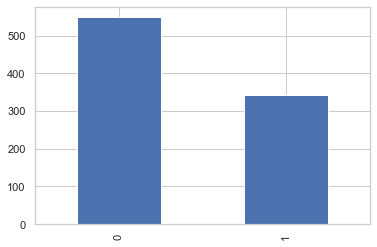

In [68]:
data['Survived'].value_counts().plot(kind='bar')
data['Survived'].value_counts()

,0,1
Meninggal,0.090909,0.525253
Selamat,0.261504,0.122334


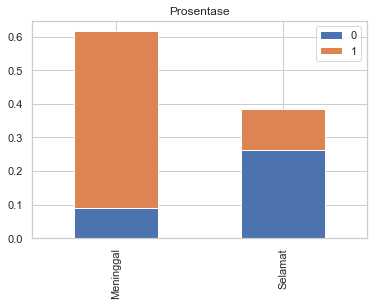

In [69]:
def survival_stacked_bar(variable):
    died=data[data['Survived']==0][variable].value_counts()/len(data['Survived']==0)
    survived=data[data['Survived']==1][variable].value_counts()/len(data['Survived']==1)
    dataset=pd.DataFrame([died,survived])
    dataset.index=['Meninggal','Selamat']
    dataset.plot(kind='bar',stacked=True,title='Prosentase')
    return dataset.head()
survival_stacked_bar('Sex')

In [70]:
data.describe()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Title,PassengerType
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,0.523008,0.381594,32.204208,1.780022,3.793490
std,0.486592,0.836071,0.477990,1.102743,0.806057,49.693429,0.770878,0.636001
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,7.910400,1.000000,4.000000
50%,0.000000,3.000000,1.000000,0.000000,0.000000,14.454200,2.000000,4.000000
75%,1.000000,3.000000,1.000000,1.000000,0.000000,31.000000,2.000000,4.000000
max,1.000000,3.000000,1.000000,8.000000,6.000000,512.329200,5.000000,5.000000
